In [50]:
from google.colab import files
upload=files.upload()

Saving fraud payment data.csv to fraud payment data (1).csv


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import (SMOTE, RandomOverSampler)
from imblearn.combine import SMOTEENN, SMOTETomek

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, recall_score, precision_score, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression

import io
df = pd.read_csv(io.BytesIO(upload['fraud payment data.csv']),encoding='latin-1')

In [52]:
encoder=LabelEncoder()
df['customer']=encoder.fit_transform(df['customer'])
df['age']=encoder.fit_transform(df['age'])
df['gender']=encoder.fit_transform(df['gender'])
df['merchant']=encoder.fit_transform(df['merchant'])
df['category']=encoder.fit_transform(df['category'])
df.drop(['zipcodeOri','zipMerchant'],axis=1,inplace=True)
df=df.query('amount>0')
df.head()

,step,customer,age,gender,merchant,category,amount,fraud
0,0,210,4,2,30,12,4.55,0
1,0,2753,2,2,30,12,39.68,0
2,0,2285,4,1,18,12,26.89,0
3,0,1650,3,2,30,12,17.25,0
4,0,3585,5,2,30,12,35.72,0


In [53]:
fraud = df[df['fraud']==1]
non_fraud = df[df['fraud']==0]
print(fraud.shape , non_fraud.shape)

(7200, 8) (587391, 8)


In [54]:
x=df.drop('fraud',axis=1)
y=df['fraud']
print(x.head())
print(y.head())

   step  customer  age  gender  merchant  category  amount
0     0       210    4       2        30        12    4.55
1     0      2753    2       2        30        12   39.68
2     0      2285    4       1        18        12   26.89
3     0      1650    3       2        30        12   17.25
4     0      3585    5       2        30        12   35.72
0    0
1    0
2    0
3    0
4    0
Name: fraud, dtype: int64


In [55]:
x_new=pd.DataFrame(data=df,columns=['amount','category','merchant','gender','age','customer'])
x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.2,random_state=0)

In [56]:
def get_report(model,x_train,x_test,y_train,y_test,name,THRESHOLD):
  model.fit(x_train,y_train)
  y_pred=np.where(model.predict_proba(x_test)[:,1] > THRESHOLD, 1, 0)
  print(name,'\n')
  classification_report_m=classification_report(y_test,y_pred)
  print(classification_report_m)
  confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
  print('confusion matrix')
  print(confusion_matrix, '\n')
  print('\n')
  print('for test data')
  accuracy=accuracy_score(y_test,y_pred)
  print('accuracy =',accuracy)
  precision_score_m=precision_score(y_test,y_pred)
  print('presicion score = ',precision_score_m)
  recall_score_m=recall_score(y_test,y_pred)
  print('recall score =',recall_score_m)
  f1_score_m=f1_score(y_test,y_pred)
  print('F1 score =',f1_score_m)
  print('\n')
  print('for train data')
  y_pred_train=np.where(model.predict_proba(x_train)[:,1] > THRESHOLD, 1, 0)
  accuracy_t=accuracy_score(y_train,y_pred_train)
  print('accuracy =',accuracy_t)
  precision_score_m_t=precision_score(y_train,y_pred_train)
  print('presicion score = ',precision_score_m_t)
  recall_score_m_t=recall_score(y_train,y_pred_train)
  print('recall score =',recall_score_m_t)
  f1_score_m_t=f1_score(y_train,y_pred_train)
  print('F1 score =',f1_score_m_t)
  print('\n')
  print('to understand whether our model is overfitting or underfitting, we can check the f1 scores')
  print(f1_score_m_t,' - ',f1_score_m,' = ',f1_score_m_t-f1_score_m)
  print('in percentage = ',(f1_score_m_t-f1_score_m)*100)
  

In [57]:
log_reg=LogisticRegression(max_iter=1000)
name='logistic regression on unbalanced data with threshold=0.5'
THRESHOLD=0.5
get_report(log_reg,x_train,x_test,y_train,y_test,name,THRESHOLD)

logistic regression on unbalanced data with threshold=0.5 

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    117454
           1       0.88      0.58      0.70      1465

    accuracy                           0.99    118919
   macro avg       0.94      0.79      0.85    118919
weighted avg       0.99      0.99      0.99    118919

confusion matrix
[[117336    118]
 [   618    847]] 



for test data
accuracy = 0.9938109133107409
presicion score =  0.877720207253886
recall score = 0.5781569965870307
F1 score = 0.697119341563786


for train data
accuracy = 0.9939433054709969
presicion score =  0.8775132275132275
recall score = 0.5783783783783784
F1 score = 0.6972149238045192


to understand whether our model is overfitting or underfitting, we can check the f1 scores
0.6972149238045192  -  0.697119341563786  =  9.558224073324961e-05
in percentage =  0.009558224073324961


In [58]:
name='logistic regression on unbalanced data with threshold=0.1'
THRESHOLD=0.1
get_report(log_reg,x_train,x_test,y_train,y_test,name,THRESHOLD)

logistic regression on unbalanced data with threshold=0.1 

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    117454
           1       0.62      0.72      0.67      1465

    accuracy                           0.99    118919
   macro avg       0.81      0.86      0.83    118919
weighted avg       0.99      0.99      0.99    118919

confusion matrix
[[116817    637]
 [   412   1053]] 



for test data
accuracy = 0.9911788696507707
presicion score =  0.6230769230769231
recall score = 0.7187713310580205
F1 score = 0.6675118858954041


for train data
accuracy = 0.9916749356699575
presicion score =  0.6350220599421877
recall score = 0.7278116826503923
F1 score = 0.6782580435489113


to understand whether our model is overfitting or underfitting, we can check the f1 scores
0.6782580435489113  -  0.6675118858954041  =  0.010746157653507171
in percentage =  1.0746157653507171


In [59]:
name='logistic regression on unbalanced data with threshold=0.24'
THRESHOLD=0.24
get_report(log_reg,x_train,x_test,y_train,y_test,name,THRESHOLD)

logistic regression on unbalanced data with threshold=0.24 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    117454
           1       0.76      0.65      0.70      1465

    accuracy                           0.99    118919
   macro avg       0.88      0.82      0.85    118919
weighted avg       0.99      0.99      0.99    118919

confusion matrix
[[117150    304]
 [   513    952]] 



for test data
accuracy = 0.9931297774115154
presicion score =  0.7579617834394905
recall score = 0.6498293515358362
F1 score = 0.6997427416391033


for train data
accuracy = 0.9935417682773003
presicion score =  0.7723460830435672
recall score = 0.658413251961639
F1 score = 0.7108433734939759


to understand whether our model is overfitting or underfitting, we can check the f1 scores
0.7108433734939759  -  0.6997427416391033  =  0.011100631854872534
in percentage =  1.1100631854872534


In [60]:
name='logistic regression on unbalanced data with threshold=0.25'
THRESHOLD=0.25
get_report(log_reg,x_train,x_test,y_train,y_test,name,THRESHOLD)

logistic regression on unbalanced data with threshold=0.25 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    117454
           1       0.77      0.65      0.70      1465

    accuracy                           0.99    118919
   macro avg       0.88      0.82      0.85    118919
weighted avg       0.99      0.99      0.99    118919

confusion matrix
[[117172    282]
 [   518    947]] 



for test data
accuracy = 0.993272731859501
presicion score =  0.7705451586655818
recall score = 0.6464163822525597
F1 score = 0.7030438010393467


for train data
accuracy = 0.9935396659883281
presicion score =  0.77579776212184
recall score = 0.6528334786399302
F1 score = 0.7090237666887604


to understand whether our model is overfitting or underfitting, we can check the f1 scores
0.7090237666887604  -  0.7030438010393467  =  0.005979965649413721
in percentage =  0.5979965649413721


In [61]:
name='logistic regression on unbalanced data with threshold=0.26'
THRESHOLD=0.26
get_report(log_reg,x_train,x_test,y_train,y_test,name,THRESHOLD)

logistic regression on unbalanced data with threshold=0.26 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    117454
           1       0.77      0.64      0.70      1465

    accuracy                           0.99    118919
   macro avg       0.88      0.82      0.85    118919
weighted avg       0.99      0.99      0.99    118919

confusion matrix
[[117178    276]
 [   522    943]] 



for test data
accuracy = 0.9932895500298522
presicion score =  0.7735849056603774
recall score = 0.6436860068259386
F1 score = 0.702682563338301


for train data
accuracy = 0.993602734657495
presicion score =  0.7830109335576114
recall score = 0.6493461203138623
F1 score = 0.7099418549232676


to understand whether our model is overfitting or underfitting, we can check the f1 scores
0.7099418549232676  -  0.702682563338301  =  0.007259291584966521
in percentage =  0.7259291584966521


In [62]:
name='logistic regression on unbalanced data with threshold=0.5'
THRESHOLD=0.5
get_report(log_reg,x_train,x_test,y_train,y_test,name,THRESHOLD)

logistic regression on unbalanced data with threshold=0.5 

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    117454
           1       0.88      0.58      0.70      1465

    accuracy                           0.99    118919
   macro avg       0.94      0.79      0.85    118919
weighted avg       0.99      0.99      0.99    118919

confusion matrix
[[117336    118]
 [   618    847]] 



for test data
accuracy = 0.9938109133107409
presicion score =  0.877720207253886
recall score = 0.5781569965870307
F1 score = 0.697119341563786


for train data
accuracy = 0.9939433054709969
presicion score =  0.8775132275132275
recall score = 0.5783783783783784
F1 score = 0.6972149238045192


to understand whether our model is overfitting or underfitting, we can check the f1 scores
0.6972149238045192  -  0.697119341563786  =  9.558224073324961e-05
in percentage =  0.009558224073324961


In [63]:
name='logistic regression on unbalanced data with threshold=0.75'
THRESHOLD=0.75
get_report(log_reg,x_train,x_test,y_train,y_test,name,THRESHOLD)

logistic regression on unbalanced data with threshold=0.75 

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    117454
           1       0.94      0.50      0.65      1465

    accuracy                           0.99    118919
   macro avg       0.96      0.75      0.82    118919
weighted avg       0.99      0.99      0.99    118919

confusion matrix
[[117404     50]
 [   733    732]] 



for test data
accuracy = 0.9934156863074866
presicion score =  0.9360613810741688
recall score = 0.49965870307167237
F1 score = 0.651535380507343


for train data
accuracy = 0.9935459728552448
presicion score =  0.9280436877610022
recall score = 0.5037489102005231
F1 score = 0.6530289330922243


to understand whether our model is overfitting or underfitting, we can check the f1 scores
0.6530289330922243  -  0.651535380507343  =  0.0014935525848812636
in percentage =  0.14935525848812636


In [64]:
name='logistic regression on unbalanced data with threshold=0.9'
THRESHOLD=0.9
get_report(log_reg,x_train,x_test,y_train,y_test,name,THRESHOLD)

logistic regression on unbalanced data with threshold=0.9 

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    117454
           1       0.95      0.44      0.60      1465

    accuracy                           0.99    118919
   macro avg       0.97      0.72      0.80    118919
weighted avg       0.99      0.99      0.99    118919

confusion matrix
[[117422     32]
 [   825    640]] 



for test data
accuracy = 0.9927934140044905
presicion score =  0.9523809523809523
recall score = 0.43686006825938567
F1 score = 0.5989705194197473


for train data
accuracy = 0.9929321044753527
presicion score =  0.951655881233346
recall score = 0.43591979075850046
F1 score = 0.597943075819182


to understand whether our model is overfitting or underfitting, we can check the f1 scores
0.597943075819182  -  0.5989705194197473  =  -0.001027443600565281
in percentage =  -0.1027443600565281


here we observed that, if we do not balance the data, but change the threshold then the following scenario is seen:
1. threshold = 0.10 gives f1 score = 0.6675
and 1.07% fitting error
2. threshold = 0.24 gives f1 score = 0.6997
and 1.11% fitting error
**3. threshold = 0.25 gives f1 score = 0.7030
and 0.59% fitting error**
4. threshold = 0.26 gives f1 score = 0.7026
and 0.72% fitting error
5. threshold = 0.50 gives f1 score = 0.6972
and 0.00% fitting error
6. threshold = 0.75 gives f1 score = 0.6530
and 0.14% fitting error
7. threshold = 0.90 gives f1 score = 0.5979
and -0.10% fitting error

In [65]:
cutoff={'threshold':[0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95]}
cutoff=pd.DataFrame(cutoff)
cutoff['accuracy']=np.nan
cutoff['recall']=np.nan
cutoff['precision']=np.nan
cutoff['f1 score']=np.nan
cutoff['difference in accuracy']=np.nan
cutoff['difference in f1 score']=np.nan
cutoff.head()

,threshold,accuracy,recall,precision,f1 score,difference in accuracy,difference in f1 score
0,0.05,NaN,NaN,NaN,NaN,NaN,NaN
1,0.10,NaN,NaN,NaN,NaN,NaN,NaN
2,0.15,NaN,NaN,NaN,NaN,NaN,NaN
3,0.20,NaN,NaN,NaN,NaN,NaN,NaN
4,0.25,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
def report(THRESHOLD):
  log_reg.fit(x_train,y_train)

  #for test data
  y_pred=np.where(log_reg.predict_proba(x_test)[:,1] > THRESHOLD, 1, 0)
  accuracy=accuracy_score(y_test,y_pred)
  precision_score_m=precision_score(y_test,y_pred)
  recall_score_m=recall_score(y_test,y_pred)
  f1_score_m=f1_score(y_test,y_pred)

  #for train data
  y_pred_train=np.where(log_reg.predict_proba(x_train)[:,1] > THRESHOLD, 1, 0)
  accuracy_t=accuracy_score(y_train,y_pred_train)
  precision_score_m_t=precision_score(y_train,y_pred_train)
  recall_score_m_t=recall_score(y_train,y_pred_train)
  f1_score_m_t=f1_score(y_train,y_pred_train)

  diff_a=accuracy_t-accuracy
  diff_f1=f1_score_m_t-f1_score_m
  
  cutoff.loc[cutoff['threshold'] == THRESHOLD, 'accuracy'] = accuracy
  cutoff.loc[cutoff['threshold'] == THRESHOLD, 'precision'] = precision_score_m
  cutoff.loc[cutoff['threshold'] == THRESHOLD, 'recall'] = recall_score_m
  cutoff.loc[cutoff['threshold'] == THRESHOLD, 'f1 score'] = f1_score_m
  cutoff.loc[cutoff['threshold'] == THRESHOLD, 'difference in accuracy'] = diff_a
  cutoff.loc[cutoff['threshold'] == THRESHOLD, 'difference in f1 score'] = diff_f1

In [80]:
for i in np.arange(0.05,1.0,0.05):
  report(i)

In [81]:
cutoff

,threshold,accuracy,recall,precision,f1 score,difference in accuracy,difference in f1 score,diff in accuracy in %,diff in f1 score in %
0,0.05,0.987538,0.769966,0.496260,0.603531,0.000528,0.008192,NaN,NaN
1,0.10,0.991179,0.718771,0.623077,0.667512,0.000496,0.010746,NaN,NaN
2,0.15,0.992196,0.684642,0.682777,0.683708,0.000549,0.014023,0.054863,1.402320
3,0.20,0.992751,0.662116,0.725505,0.692363,0.000544,0.015578,NaN,NaN
4,0.25,0.993273,0.646416,0.770545,0.703044,0.000267,0.005980,NaN,NaN
5,0.30,0.993584,0.632765,0.804688,0.708445,0.000172,0.001799,NaN,NaN
6,0.35,0.993702,0.615700,0.829044,0.706620,0.000141,0.001502,0.014080,0.150191
7,0.40,0.993752,0.602730,0.845785,0.703866,0.000156,0.001562,NaN,NaN
8,0.45,0.993786,0.589078,0.863000,0.700203,0.000156,0.002070,NaN,NaN
9,0.50,0.993811,0.578157,0.877720,0.697119,0.000132,0.000096,NaN,NaN


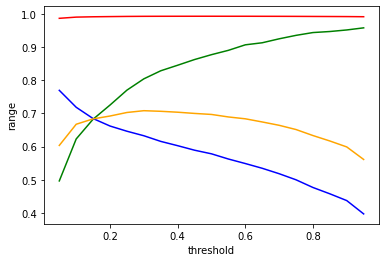

In [82]:
sns.lineplot(x=cutoff['threshold'],y=cutoff['accuracy'],color='red')
sns.lineplot(x=cutoff['threshold'],y=cutoff['precision'],color='green')
sns.lineplot(x=cutoff['threshold'],y=cutoff['recall'],color='blue')
sns.lineplot(x=cutoff['threshold'],y=cutoff['f1 score'],color='orange')
plt.ylabel('range')
plt.show()

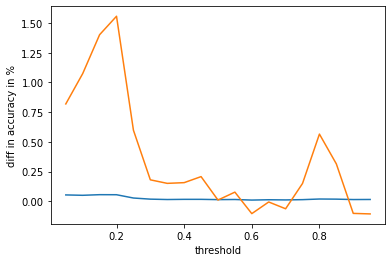

In [83]:
cutoff['diff in accuracy in %']=cutoff['difference in accuracy']*100
cutoff['diff in f1 score in %']=cutoff['difference in f1 score']*100

sns.lineplot(x=cutoff['threshold'],y=cutoff['diff in accuracy in %'])
sns.lineplot(x=cutoff['threshold'],y=cutoff['diff in f1 score in %'])
plt.show()

In [73]:
rus=RandomUnderSampler()
x2_train,y2_train=rus.fit_sample(x_train,y_train)
np.bincount(y2_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


array([5735, 5735])

In [74]:
ros = RandomOverSampler()
x3_train,y3_train=ros.fit_sample(x_train,y_train)
np.bincount(y3_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


array([469937, 469937])

In [75]:
smt=SMOTE()
x4_train,y4_train=smt.fit_sample(x_train,y_train)
np.bincount(y4_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


array([469937, 469937])

In [76]:
name='logistic regression (under sampling)'
THRESHOLD=0.5
get_report(log_reg,x2_train,x_test,y2_train,y_test,name,THRESHOLD)

logistic regression (under sampling) 

              precision    recall  f1-score   support

           0       1.00      0.95      0.97    117454
           1       0.17      0.88      0.28      1465

    accuracy                           0.95    118919
   macro avg       0.58      0.91      0.63    118919
weighted avg       0.99      0.95      0.96    118919

confusion matrix
[[111100   6354]
 [   177   1288]] 



for test data
accuracy = 0.9450802647180013
presicion score =  0.16854226642240253
recall score = 0.8791808873720136
F1 score = 0.28285933897002313


for train data
accuracy = 0.9102877070619007
presicion score =  0.9429593373493976
recall score = 0.8734088927637315
F1 score = 0.9068525391509007


to understand whether our model is overfitting or underfitting, we can check the f1 scores
0.9068525391509007  -  0.28285933897002313  =  0.6239932001808776
in percentage =  62.39932001808776


In [77]:
name='logistic regression (over sampling)'
THRESHOLD=0.5
get_report(log_reg,x3_train,x_test,y3_train,y_test,name,THRESHOLD)

logistic regression (over sampling) 

              precision    recall  f1-score   support

           0       1.00      0.95      0.98    117454
           1       0.19      0.88      0.31      1465

    accuracy                           0.95    118919
   macro avg       0.59      0.91      0.64    118919
weighted avg       0.99      0.95      0.97    118919

confusion matrix
[[111972   5482]
 [   183   1282]] 



for test data
accuracy = 0.9523625324800915
presicion score =  0.18953282081608516
recall score = 0.875085324232082
F1 score = 0.31158099404544903


for train data
accuracy = 0.9131372928711721
presicion score =  0.9500752256189017
recall score = 0.8721020051623941
F1 score = 0.9094203300543877


to understand whether our model is overfitting or underfitting, we can check the f1 scores
0.9094203300543877  -  0.31158099404544903  =  0.5978393360089387
in percentage =  59.78393360089387


In [78]:
name='logistic regression (smote sampling)'
THRESHOLD=0.5
get_report(log_reg,x2_train,x_test,y2_train,y_test,name,THRESHOLD)

logistic regression (smote sampling) 

              precision    recall  f1-score   support

           0       1.00      0.95      0.97    117454
           1       0.17      0.88      0.28      1465

    accuracy                           0.95    118919
   macro avg       0.58      0.91      0.63    118919
weighted avg       0.99      0.95      0.96    118919

confusion matrix
[[111100   6354]
 [   177   1288]] 



for test data
accuracy = 0.9450802647180013
presicion score =  0.16854226642240253
recall score = 0.8791808873720136
F1 score = 0.28285933897002313


for train data
accuracy = 0.9102877070619007
presicion score =  0.9429593373493976
recall score = 0.8734088927637315
F1 score = 0.9068525391509007


to understand whether our model is overfitting or underfitting, we can check the f1 scores
0.9068525391509007  -  0.28285933897002313  =  0.6239932001808776
in percentage =  62.39932001808776


1. using under sampling,
f1 score = 0.3146,
recall = 0.8757,
fitting problem = 59.68 

2. using over sampling,
f1 score = 0.3102,
recall = 0.8744,
fitting problem = 59.92%

3. using smote,
f1 score = 0.3146,
recall = 0.8757,
fitting problem = 59.68%